In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from fig_style import *

In [2]:
d_10um = pickle.load(open("../data/opacity_tables/kappa_10um.pkl","rb"))
d_100um = pickle.load(open("../data/opacity_tables/kappa_100um.pkl","rb"))
d_1mm = pickle.load(open("../data/opacity_tables/kappa_1mm.pkl","rb"))
d_1cm = pickle.load(open("../data/opacity_tables/kappa_1cm.pkl","rb"))
print('Sublimation temperatures:',d_1mm['T_crit'])

Sublimation temperatures: [ 150  425  680 1200]


In [7]:
def plot_opacity(ax, d, **kwargs):
    plt.sca(ax[0])
    plt.plot(d['T'], d['kappa_p'], **kwargs)
    plt.plot(d['T'], d['kappa_r'], ls='--',label='_nolegend_', **kwargs)
    plt.xscale('log'); plt.yscale('log')
    plt.xlim(5,2e3); plt.xlabel(r'$T$ [K]')
    plt.ylim(1e-2,1e2); plt.ylabel(r'$\kappa_{\rm P}, \kappa_{\rm R}$ [cm$^2$ g$^{-1}$]')
    plt.sca(ax[1])
    plt.plot(d['lam'], d['kappa'][0], **kwargs)
    plt.plot(d['lam'], d['kappa_s'][0], ls=':',label='_nolegend_', **kwargs)
    i1,i2 = np.argmin(np.abs(d['lam']-0.087)), np.argmin(np.abs(d['lam']-0.9))
    lam1, lam2 = d['lam'][i1], d['lam'][i2]
    kappa1, kappa2 = d['kappa'][0][i1], d['kappa'][0][i2]
    print(np.log(kappa2/kappa1)/np.log(lam2/lam1))
    plt.xscale('log');plt.yscale('log')
    plt.xlim(1e-2, 1); plt.xlabel('$\lambda$ [cm]')
    plt.ylim(1e-4,1e0); plt.ylabel(r'$\kappa_\nu$ [cm$^2$ g$^{-1}$]')

-1.789990543270807
-1.86221170286561
-2.3576515648663268
-1.3601442050132606


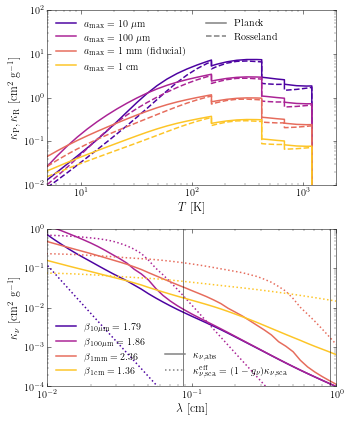

In [19]:
fig, ax = plt.subplots(
    2,1,figsize=(5,6),
    gridspec_kw = {'height_ratios': [1,0.9]},
)

my_cmap = matplotlib.cm.get_cmap('plasma')
c = my_cmap((np.arange(4)+0.5)/4)

plot_opacity(ax, d_10um, color=c[0])
plot_opacity(ax, d_100um, color=c[1])
plot_opacity(ax, d_1mm, color=c[2])
plot_opacity(ax, d_1cm, color=c[3])

plt.sca(ax[0])
plt.plot([],[],'tab:grey',ls='-')
plt.plot([],[],'tab:grey',ls='--')
plt.plot([],[],alpha=0)
plt.plot([],[],alpha=0)
plt.legend(
    [r'$a_{\rm max}=10~\mu$m',
    r'$a_{\rm max}=100~\mu$m',
    r'$a_{\rm max}=1~$mm (fiducial)',
    r'$a_{\rm max}=1~$cm',
    r'Planck',
    r'Rosseland',
    '',''],
    frameon=False, loc=2, ncol=2, fontsize=10,
)
set_ticks()


plt.sca(ax[1])
plt.plot([],[],ls='None')
plt.plot([],[],ls='None')
plt.plot([],[],'grey')
plt.plot([],[],'grey',ls=':')
plt.plot([0.087, 0.087],plt.ylim(),'k',lw=0.5)
plt.plot([0.9, 0.9],plt.ylim(),'k',lw=0.5)
plt.legend(
    [r'$\beta_{10\mu\rm m} = 1.79$',
    r'$\beta_{100\mu\rm m} = 1.86$',
    r'$\beta_{1\rm mm} = 2.36$',
    r'$\beta_{1\rm cm} = 1.36$',
    '','',
    r'$\kappa_{\nu,\rm abs}$',
    r'$\kappa_{\nu,\rm sca}^{\rm eff} = (1-g_{\nu})\kappa_{\nu,\rm sca}$',
    ],
    frameon=False, fontsize=10, ncol=2,
)
set_ticks()

plt.tight_layout()
plt.savefig('../figures/opacity.pdf',bbox_inches='tight')